In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Fly-AI/dogs-vs-cats'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1900.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.192.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.193.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1929.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.190.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1948.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1972.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.2005.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1962.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1971.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1965.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1998.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.196.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1976.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/cat.1963.jpg
/content/drive/MyDrive/Fly-AI/dogs-vs-

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import zipfile
import seaborn as sns


from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Dropout,Flatten, Dense, Input)

In [7]:
IMAGE_H = 100
IMAGE_W = 100
IMAGE_C = 3

In [ ]:
# Unzipping the train file

# ziplocation = '/content/drive/MyDrive/dogs-vs-cats/train.zip'
# destination = '/content/drive/MyDrive/dogs-vs-cats/train_images'

# os.makedirs(destination,exist_ok=True)

# with zipfile.ZipFile(ziplocation,'r') as zip_ref:
#     zip_ref.extractall(destination)

In [8]:
images = os.listdir('/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train')
cate = []

for image in images:
  temp = image.split('.')[0]
  if temp.lower() == 'cat': #lower(): 소문자로 바꿔주기
    cate.append('cat')
  else:
    cate.append('dog')


df = pd.DataFrame({'image':images,
                   'type':cate})

In [9]:
df

,image,type
0,cat.6856.jpg,cat
1,dog.485.jpg,dog
2,dog.2425.jpg,dog
3,cat.9032.jpg,cat
4,cat.6301.jpg,cat
...,...,...
24995,dog.11326.jpg,dog
24996,dog.11308.jpg,dog
24997,dog.11332.jpg,dog
24998,dog.11324.jpg,dog


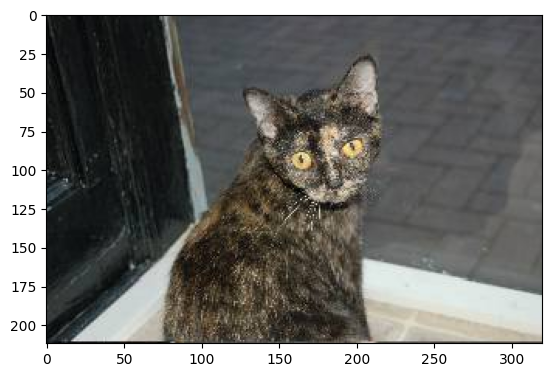

In [10]:
sample = random.choice(images)
image = load_img('/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train'+'/'+sample)
plt.imshow(image)

#이미지 로드:load_img('파일위치')

In [11]:
#Data augmentation

dataAug = ImageDataGenerator(
          rescale = 1./255
)


In [12]:
#data spliting

train,val = train_test_split(df,test_size=0.2,random_state=42)

print(train.shape)
print(val.shape)

(20000, 2)
(5000, 2)


In [13]:
traindata = dataAug.flow_from_dataframe(train,
        '/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/',
                                        x_col = 'image',
                                        y_col = 'type',
                                        target_size = (150,150),
                                        class_mode = 'categorical',
                                        batch_size = 15)

valdata = dataAug.flow_from_dataframe(val,
        '/content/drive/MyDrive/Fly-AI/dogs-vs-cats/train/',
                                        x_col = 'image',
                                        y_col = 'type',
                                        target_size = (150,150),
                                        class_mode = 'categorical',
                                        batch_size = 15)

Found 19999 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 5000 validated image filenames belonging to 2 classes.


In [14]:
input_layer = Input(shape=(150,150,3))
x = Conv2D(32,(3,3),activation='relu',padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Conv2D(64,(3,3),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Conv2D(64,(3,3),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Conv2D(128,(3,3),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=input_layer,outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        18496 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(traindata,validation_data=valdata,epochs=10)

Epoch 1/10
  23/1334 [..............................] - ETA: 1:47:28 - loss: 1.4533 - accuracy: 0.5594